# Characterizing data distribution

#### We want to represent the dataset in a human-friendly format to get a good impression of it. This is a kind of dataset "identity card".

- Data format : autoML

In [48]:
data_dir = '../../data'

datasets = {'iris': (data_dir + '/iris', 'iris'),
            'iris_1': (data_dir + '/iris_1', 'iris'),
            'iris_2': (data_dir + '/iris_2', 'iris'),
            'mimic': (data_dir + '/mimic', 'mimic'),
            'mushrooms': (data_dir + '/mushrooms', 'mushrooms'),
            'chems': (data_dir + '/chems', 'chems'),
            'credit': (data_dir + '/credit_data', 'credit'),
            'squares': (data_dir + '/squares', 'squares'),
            'squares_2': (data_dir + '/squares_2', 'squares'),
            'adult': (data_dir + '/adult', 'adult')}

input_dir, basename = datasets['iris_1']

## Characterization

### Visualization
- Scatter plot matrix
- Classes distribution
- Hierarchical clustering with heatmap matrix
- Hierarchical clustering with correlation matrix
- Principal components analysis (PCA)
- Linear discriminant analysis (LDA)
- T-distributed stochastic neighbor embedding (t-SNE algorithm)

### Meta features

- **Simple features, Simple Measurements or General Data Characteristic** are directly and easily accessible properties of the dataset wich need almost no computations such as number of classes or number of attributes.
    
    - Number of records: $n$
    - Number of attributes: $m$
    -  Number of classes: $q$
    -  Ratio of symbolic attributes: $\frac{m_{symb}}{m}$
    -  DatasetRatio $=\frac{NumberOfFeatures}{NumberOfInstances}$  
    -  Default error rate: $1 - Acc_{def}$ where $Acc_{def}$ is the probability of the largest class or default accuracy.
    -  Standard deviation of the class distribution: $\sigma_{class}$
    -  Relative probability of defective records: $\frac{n_{defTuple}}{n}$ where $n_{defTuple}$ is the number of records with missing values.
    -  Relative probability of missing values: $\frac{h_{missVal}}{n \times m}$ where $h_{missVal}$ is the number of missing values.

<br>   
- **Statistical features** use statistical analysis methods and tests (Engels and Theusinger, 1998; Sohn 1999).
    
    - Kurtosis: Fourth central moment divided by the square of the variance $\frac{E[(x_i-E[x_i])^4]}{[E[(x_i-E[x_i])^4]]^2}$ where $x_i$ is the ith feature. 
    - PCAKurtosis: Transform the dataset X by PCA, then compute the kurtosis
    - SkewnessMin: min over skewness of all features. Skewness measures the symmetry of a distribution. A skewness value > 0 means that there is more weight in the left tail of the distribution

<br> 
- **Discriminant Measurements** compute a discriminant analysis leading to the following measurements:
    
    -  Relative importance if the largest eigenvalue as an indication for the importance of the $1{\text{st}}$ discriminant function
    -  Canonical correlation, which is an indicator for the degree of correlation between the most significant discriminant function and class distribution. There is a strong correlation between the classes and the $1{\text{st}}$ discriminant function if this measurement is close to unity.
    -  Number of discriminant functions
    -  Wilks Lambda describes the significance of the r discriminant functions and is defined as follows:
        
        $$ \Lambda = \Pi^{DiscFct}_{j=1} \frac{1}{1 + \lambda_j} $$
        
        If Wlambda is near zero, in principle this indicates there is a good possibility for making good discriminations.

<br> 
-  **Information-theoric features** typically use entropy measures of the attributes and the class label (Segrera et al., 2008).
    
    -  ClassEntropy $= mean(-\sum_{i=1}^{n}p(Class_i)ln(p(Class_i)))$ where $p(Class_i)$ is the probability of having an instance of Class\_i
    -  Join entropy
    -  Average attribute entropy
    -  Average mutual information
    -  Relevance-measure
    -  Signal Noise Ratio

<br> 
-  **Model-based features** create a model of the data, e.g. a decision tree, and use properties of it, e.g. the width and height of the tree, as features (Peng et al., 2002 used 17 properties of a decision tree).

<br> 
-  **Landmarking features** apply fast computable classifiers, e.g. Naive Bayes or 1-Nearest Neighbor, on the dataset (Pfahringer et al., 2000; Bensusan and Giraud-Carrier, 2000) and use the resulting performance as meta-features. This can be done with several metrics.
    
    <!-- -  Landmark[Some\_Model]: accuracy of [Some\_Model] applied on dataset. -->
    <!-- -  LandmarkDecisionNodeLearner \& LandmarkRandomNodeLearner: Both are decision tree with max\_depth=1. `DecisionNode' considers all features when looking for best split, and `RandomNode' considers only 1 feature, where comes the term `random'. -->

<br> 
-  **Time-based features** are specialized for time predictions. They contain time measures of several computations regarding the dataset, e.g. the time for computing the other meta-features. Meta-features of this group have the benefit that they are able to take the performance of the computer into account. In (Reif et al., 2011) they present nine different time-measures.
    
    -  Training time ?
    -  Testing time ?

<!-- 
A voir : Algorithm Characteristics

ClassProbabilityMin $= min_{i=1 \dots n}(p(Class_i))= min_{i=1 \dots n}(\frac{NumberOfInstances\_Class_i}{TotleNumberOfInstances}) $

NumSymbols: For each categorial feature, compute how many unique values there is ???

Interpretability of the model ? -->

In [49]:
# AutoML
import sys
main_path = '../../'
sys.path.append(main_path + 'code/auto_ml')
sys.path.append(main_path + 'code/processing')
sys.path.append(main_path + 'code/functions')
sys.path.append(main_path + 'code/models')
sys.path.append(main_path + 'data')

%matplotlib inline
%load_ext autoreload
%autoreload 2

from auto_ml import AutoML

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Read data

In [50]:
D = AutoML(input_dir, basename)
#D = AutoML.from_csv(input_dir, basename, 'adult.data')

In [51]:
D.show_info()

Usage: Sample dataset iris data
Name: Iris
Task: Multiclass classification
Target type: Numerical
Feat type: Numerical
Metric: Bac metric
Time budget: 1200
Feat num: 4
Target num: 3
Label num: 3
Train num: 105
Valid num: 15
Test num: 30
Has categorical: 0
Has missing: 0
Is sparse: 0


In [52]:
data = D.get_data('X')
data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,6.3,2.5,5.0,1.9
1,5.4,3.4,1.5,0.4
2,6.0,3.0,4.8,1.8
3,5.8,2.7,4.1,1.0
4,5.5,2.4,3.7,1.0


In [53]:
D.feat_type

['Numerical', 'Numerical', 'Numerical', 'Numerical']

In [54]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,30.000000,30.000000,30.000000,30.000000
mean,5.773333,2.886667,3.673333,1.146667
std,0.805555,0.412506,1.723656,0.775813
min,4.300000,2.200000,1.100000,0.100000
25%,5.100000,2.500000,1.525000,0.225000
50%,5.750000,3.000000,4.150000,1.300000
75%,6.300000,3.200000,5.000000,1.775000
max,7.700000,3.500000,6.700000,2.300000


### Simplification

For numerical variables:
    - Replace missing values, NaN, with the median
    - Replace +Inf by the maximum and -Inf by the minimum

For categorical variables:
    - Replace missing values by 'missing'
    - Encoding (label or one-hot)

- Normalization (mean or min-max)

In [55]:
# Need a way of deep copying pandas DF
# Currently, it modify the original data
#D.process_data()
#processed_data = D.get_data('all', processed=True)
#processed_data.head()

# Visualization

In [56]:
D.subsets

{'X': array(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
       dtype=object),
 'train': range(0, 15),
 'test': range(15, 30),
 'y': array(['setosa', 'versicolor', 'virginica'], dtype=object)}

** Descriptors **

Ratio: 0.0380952380952381
Symb ratio: 1.0
Class deviation: 0.47856247301278126
Missing proba: 0.0
Skewness min: -0.34346628078360114
Skewness max: 0.2716873117171394
Skewness mean: -0.09251884551786119



** Plots **

** Scatter plot matrix **

Pairplot of X set


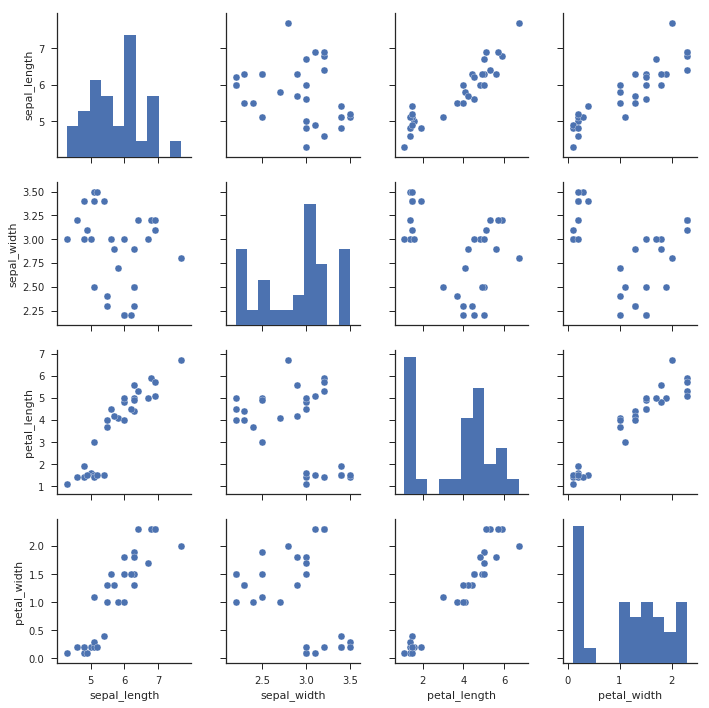

** Correlation matrix **

Correlation matrix of X set


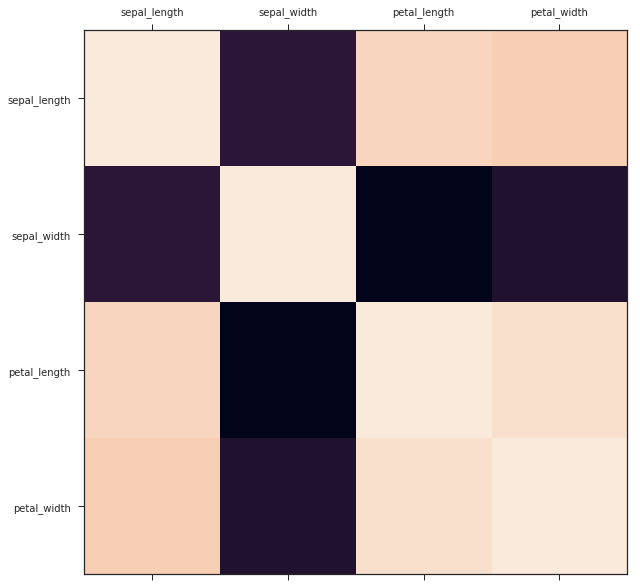

** Hierarchical clustering heatmap **

Hierarchical clustering heatmap of X set

Performing hierarchical clustering using euclidean for columns and euclidean for rows
Column clustering completed in 0.0 seconds
Row clustering completed in 0.0 seconds


../../code/functions/utilities.py:184: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Y2 = sch.linkage(D2, method=column_method, metric=column_metric)
../../code/functions/utilities.py:204: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Y1 = sch.linkage(D1, method=row_method, metric=row_metric)


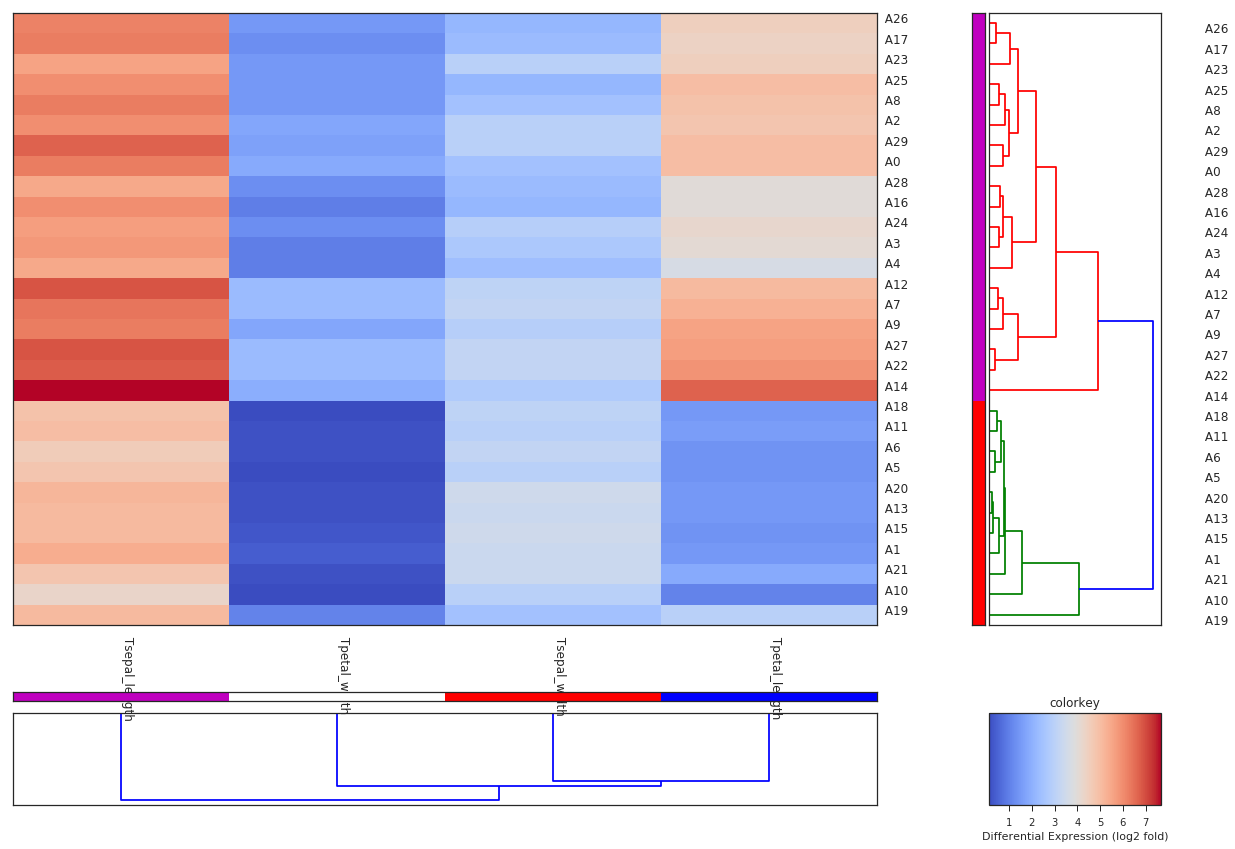

** Classes distribution **

Classes distribution of y_train set


/usr/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


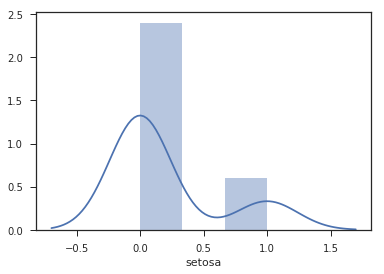

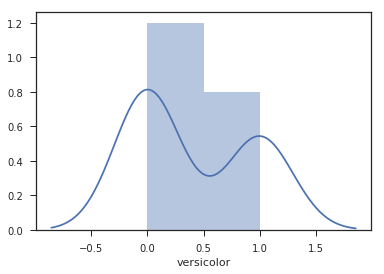

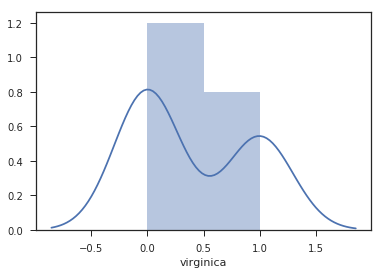

** Principal components analysis **

Could not show PCA because X has 30 rows and Y has 15 rows


** t-distributed stochastic neighbor embedding **

Could not show t-SNE because X has 30 rows and Y has 15 rows


** Linear discriminant analysis **

Could not show LDA because X has 30 rows and Y has 15 rows


In [62]:
D.show_characteristics(sets=['X', 'y_train'], processed=False)

Principal components analysis of X and y sets
Explained variance ratio of the 4 components: 
 [0.93900687 0.03877009 0.01580087 0.00642218]


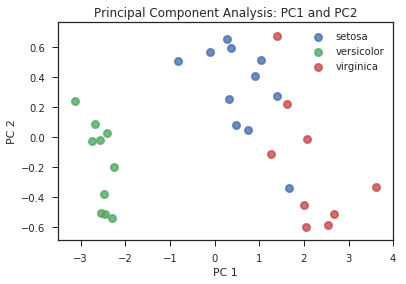

Principal components analysis of X_train and y_train sets
Explained variance ratio of the 4 components: 
 [0.95850942 0.02296468 0.01398541 0.00454048]


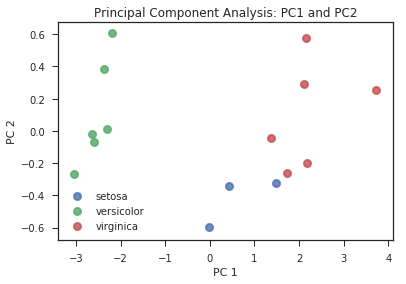

In [64]:
D.show_pca()
D.show_pca('X_train', 'y_train')

In [58]:
#D.data
#D.get_data('y_test')

### Help

To know names of AutoML methods and their documentation

In [26]:
import inspect
inspect.getmembers(AutoML)

[('__class__', type),
 ('__delattr__', <slot wrapper '__delattr__' of 'object' objects>),
 ('__dict__',
  mappingproxy({'__module__': 'auto_ml',
                '__init__': <function auto_ml.AutoML.__init__(self, input_dir='', basename='', test_size=0.2, verbose=False)>,
                'from_df': <classmethod at 0x7fcdd0d852b0>,
                'from_csv': <classmethod at 0x7fcdd0d852e8>,
                'init_data': <function auto_ml.AutoML.init_data(self, test_size=0.2)>,
                'train_test_split': <function auto_ml.AutoML.train_test_split(self, **kwargs)>,
                'load_data': <function auto_ml.AutoML.load_data(self, filepath)>,
                'load_label': <function auto_ml.AutoML.load_label(self, filepath)>,
                'load_name': <function auto_ml.AutoML.load_name(self, filepath)>,
                'load_type': <function auto_ml.AutoML.load_type(self, filepath)>,
                'init_info': <function auto_ml.AutoML.init_info(self, filepath, verbose=True)>

In [27]:
?AutoML.show_descriptors

In [28]:
?AutoML.process_data